In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

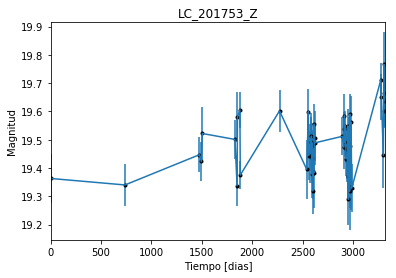

In [2]:
data = np.genfromtxt('LC_201753_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_201753_Z')
plt.savefig("LC_201753_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

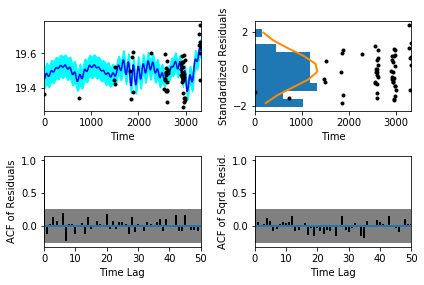

In [5]:
sample.assess_fit()

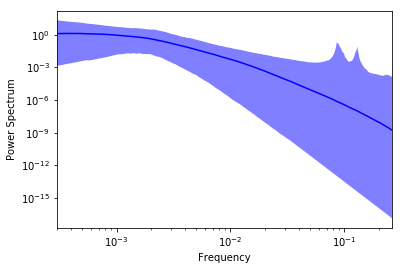

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

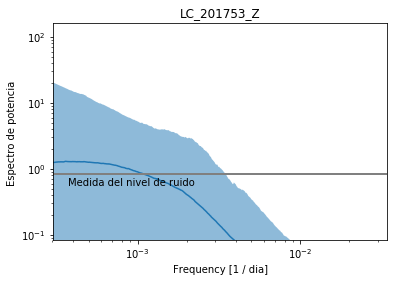

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_201753_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_201753_Z')

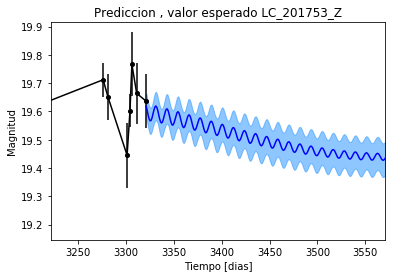

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_201753_Z')

Text(0.5,1,'Prediccion, Caminos simulados LC_201753_Z')

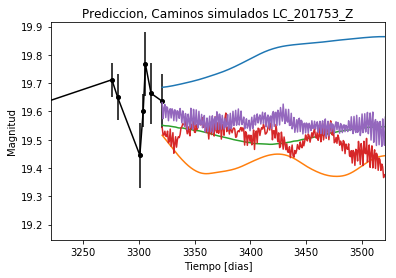

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_201753_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


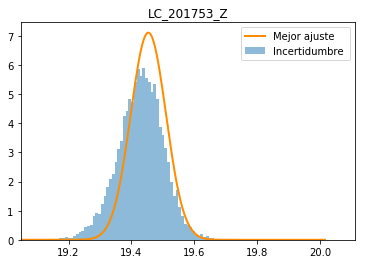

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_201753_Z')
plt.savefig("Mejor_ajuste_LC_201753_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_201753_Z')

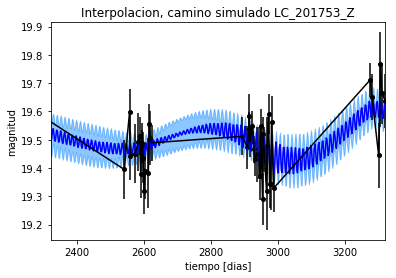

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_201753_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_201753_Z')

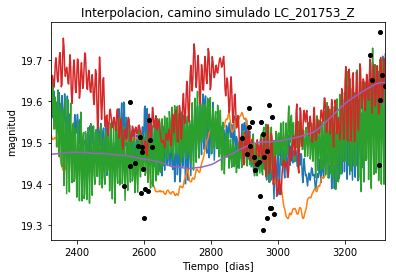

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_201753_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 354.34794909
Median: 0.00223480032067
Standard deviation: 0.0911452904506
68% credibility interval: [ 0.00054006  0.05611159]
95% credibility interval: [  3.27930283e-04   3.51889204e-01]
99% credibility interval: [  3.08795885e-04   4.92160972e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1207.86969438
Median: 0.00134433243803
Standard deviation: 0.0552539331765
68% credibility interval: [ 0.00046393  0.01492677]
95% credibility interval: [ 0.00032417  0.2067997 ]
99% credibility interval: [  3.05140333e-04   3.72062929e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 383.653942343
Median: 0.00601058051985
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 426.240037723
Median: 76.0111215997
Standard deviation: 1.957853525
68% credibility interval: [ 74.22506325  77.50005065]
95% credibility interval: [ 71.84527559  79.90804672]
99% credibility interval: [ 69.75758975  81.82889235]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 696.770442106
Median: 0.266303423928
Standard deviation: 1.13136815805
68% credibility interval: [ 0.02490237  1.89318476]
95% credibility interval: [ 0.01172658  3.82309773]
99% credibility interval: [ 0.00997789  5.49925716]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1037.61634438
Median: 0.297237562695
Standard deviation: 2.48877954481
68% credibility interval: [ 0.00600085  2.62285867]
95% credibility interval: [  5.24152840e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 3.81701047241e-22
Standard deviation: 6.00062041613e+124
68% credibility interval: [  2.63064528e-61   6.63664135e+43]
95% credibility interval: [  7.10404887e-111   4.02346497e+084]
99% credibility interval: [  1.19668290e-125   1.19936446e+102]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1530.45808456
Median: 19.4892142266
Standard deviation: 0.0435876113907
68% credibility interval: [ 19.4514755   19.52208287]
95% credibility interval: [ 19.38783726  19.56478684]
99% credibility interval: [ 19.33632813  19.61617023]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 525.576326999
Median: 0.0314269985877
Standard deviation: 0.127588998907
68% credibility interval: [ 0.          0.21325823]
95% credibility interval: [ 0.          0.44934697]
99% credibility interval: [ 0.          0.50732365]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 525.576326999
Median: 0.0314269985877
Standard deviation: 0.127588998907
68% credibility interval: [ 0.          0.21325823]
95% credibility interval: [ 0.          0.44934697]
99% credibility interval: [ 0.          0.50732365]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2023.2141691
Median: 0.0
Standard deviation: 0.00508370506522
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 426.240037723
Median: 76.0111215997
Standard deviation: 1.957853525
68% credibility interval: [ 74.22506325  77.50005065]
95% credibility interval: [ 71.84527559  79.90804672]
99% credibility interval: [ 69.75758975  81.82889235]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2436.06219178
Median: 0.00736440937058
Standard deviation: 0.0130012995809
68% credibility interval: [ 0.00349009  0.01550146]
95% credibility interval: [ 0.00147718  0.0352091 ]
99% credibility interval: [ 0.00063672  0.07135102]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 519.892761563
Median: 1.07622393342
Standard deviation: 0.185571079098
68% credibility interval: [ 0.90440724  1.26900381]
95% credibility interval: [ 0.73852945  1.48419595]
99% credibility interval: [ 0.68004823  1.62991576]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 431.540278115
Median: 1.1457110823e-06
Standard deviation: 0.0158880251597
68% credibility interval: [  9.17418831e-48   8.05511941e-04]
95% credibility interval: [  1.58764738e-87   2.00247863e-02]
99% credibility interval: [  1.47782268e-105   9.94745519e-002]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 354.34794909
Median: (-0.0140416645393+0j)
Standard deviation: 0.985206994725
68% credibility interval: [-0.35255954-1.14708811j -0.00339329-0.57440388j]
95% credibility interval: [ -2.21098508e+00-0.02397301j  -2.06044674e-03-0.02112335j]
99% credibility interval: [ -3.09233859e+00+0.j          -1.94022177e-03-0.00179424j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1207.86969438
Median: (-0.00844668982257+1.57558947446j)
Standard deviation: 0.873610202701
68% credibility interval: [-0.09378766+0.23151411j -0.00291493+0.01036657j]
95% credibility interval: [-1.29936082 +2.78566214e+00j -0.00203680 +3.35248342e-04j]
99% credibility interval: [ -2.33774033e+00+1.54291476j  -1.91725325e-03+0.01078595j]
Posterior summ